<a href="https://www.kaggle.com/code/megr25/pima-indians-0-values-log-knn-and-dft?scriptVersionId=114318413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1.Introduction 

### In This Kernel I tried to fill those 0 values by using the correalation between variables, I also ask for some comment (doctor) to make sure about the relation between varaiable, these kernel is not that visual friendly because I had to find several intervals/ each columns , instead of using the mean / columns , I checked several kernel with 90% accurancy but i got 61 max, anyway it was a great challenge because it improved my pandas and numpy skills. Feel free to provide some feedback or a better way to find or replace the values 

In [1]:
#Basic library
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#visualization 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style("whitegrid")

df= pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# 1.1. Conclusion 

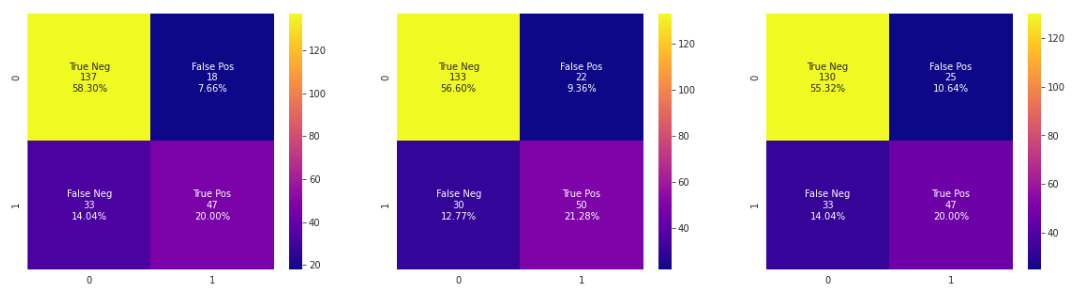

In [2]:
from IPython.display import display
from PIL import Image
path="../input/conclusion/conclusion.png"
display(Image.open(path))

    **From *LEFT* to *RIGHT***  BEST = "Logistical Regression" - Random Forest - KNN cluster

In [3]:
df.describe()[1:6]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. Scrub data** (filtering, extracting , replacing , handle missing values)

### When I was analyzing this data frame I realized that there were many 0 values,then i was checking others kenerls and found out that many people was asking if theses 0 were set in purpose including myself,because I couldnt find any guidance , I decided to fill them out. 
1. I decided to fill out those value that has some kind of relation between variables
2. I wrote a Funcion to easily chech how many Zeros are lefft to keep tracking 

In [5]:
def finding_zeros (frame):
    columns = frame.columns[:8]
    for i in columns:
        zeros = len(frame.loc[frame[i]==0])
        print(f'The numbers of 0 values in {i} = {zeros}')
        
finding_zeros(df)

The numbers of 0 values in Pregnancies = 111
The numbers of 0 values in Glucose = 5
The numbers of 0 values in BloodPressure = 35
The numbers of 0 values in SkinThickness = 227
The numbers of 0 values in Insulin = 374
The numbers of 0 values in BMI = 11
The numbers of 0 values in DiabetesPedigreeFunction = 0
The numbers of 0 values in Age = 0


In [6]:
#Finding Missing Values
NAN_value = (df.isnull().sum() / len(df)) * 100
Missing = NAN_value[NAN_value==0].index.sort_values(ascending=False)
Missing_data = pd.DataFrame({'Missing Ratio' :NAN_value})
Missing_data.head()

,Missing Ratio
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0


# "--------  Section 2 ----------"


# 3. FINDING MISSING VALUES

## In this section I want to drop all those rows which as 0 Values in all the columns
1. Because later I want to find some relation between variable but 0 values might affect the final result
2. I realized I can do this with dropna.(tresh=#), but I will have to create a new Dataframe and applya pd.join
3. I check other forums and many user mentioned the highest accurancy was 60 % so I thought that the missing values might influence the final result 

In [7]:
def finding_zeros (frame):
    columns = frame.columns[:8]
    for i in columns:
        zeros = len(frame.loc[frame[i]==0])
        print(f'The numbers of 0 values in {i} = {zeros}')
        
# Let's Find all those Cells that have 0 Values
cond1= df[(df['Insulin']==0) & (df['SkinThickness']==0) & (df['Pregnancies']==0) & (df['BloodPressure']==0) & (df['BMI']==0)].index
cond2 = df[(df['Insulin']==0) & (df['SkinThickness']==0) & (df['Pregnancies']==0) & (df['BloodPressure']==0)].index
Zeros_values = cond2.append(cond1) 
df.drop(Zeros_values,inplace=True)

finding_zeros(df)

The numbers of 0 values in Pregnancies = 101
The numbers of 0 values in Glucose = 5
The numbers of 0 values in BloodPressure = 25
The numbers of 0 values in SkinThickness = 217
The numbers of 0 values in Insulin = 364
The numbers of 0 values in BMI = 10
The numbers of 0 values in DiabetesPedigreeFunction = 0
The numbers of 0 values in Age = 0


## 3.1. Finding the Relation Between Variable to fill out values 0
1. By using a heatmap, I intended to find a relation between variable (Glucose-Skinthickness-BMI-Insulin), later I will use the relation with stronger coorelation to find the missing values
2. Instead of using the group mean or Interpolate, I will sort the value by ranks I.e Find all People with Glucose btwn A-B, then extract the mean and use this value to fill the missing one 

variable relationship


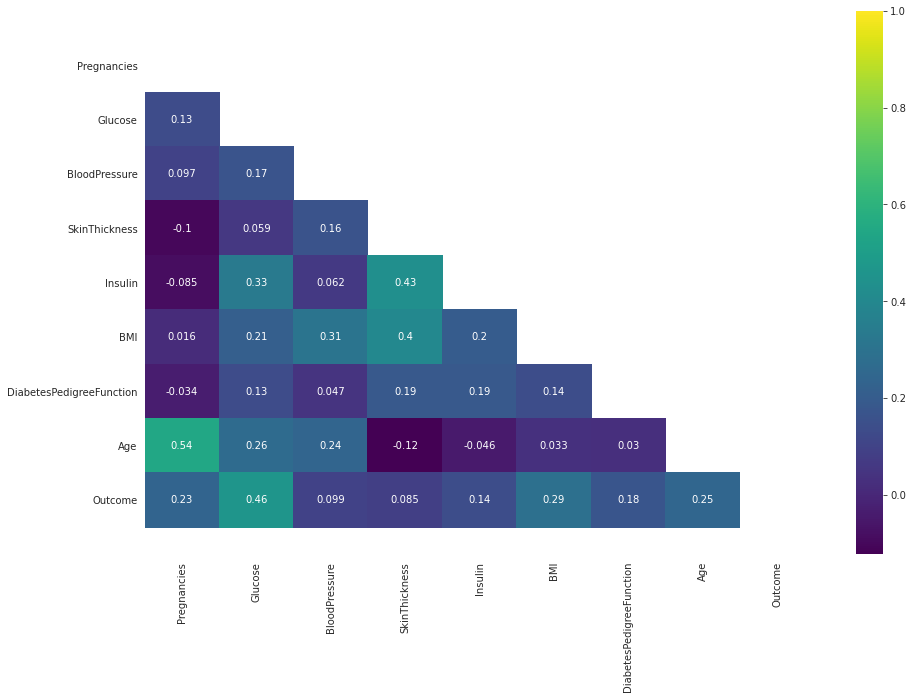

In [8]:
f,ax = plt.subplots(figsize=(15,10))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask,ax=ax,cmap='viridis')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+ 0.5, top - 0.5)
print("variable relationship")

**Conclusion:** Glucose -  Insulin , Skinthickness - BMI

# "--------  Section 3 ----------"

## 4. Finding Insuline Values

1.  Isuline has 364 "0" so I will try to fill them according to Glucose and Skinthickness, but first I will create some graph to have a general view of the data Behav.
2.  Based on the Graph , We can notice that Insuline - Glucose has a better reationship "it might seemed a linear regresion" , the higher A is , B is as well,(please feel free to let any comment on this)
3. Because Glucose is gonna be my parameter I have to create some Interval to limite the values (I.e People who has glucose btwn A and B and then Extract the mean)

This shows that the Higher Glucose. Higher Insuline


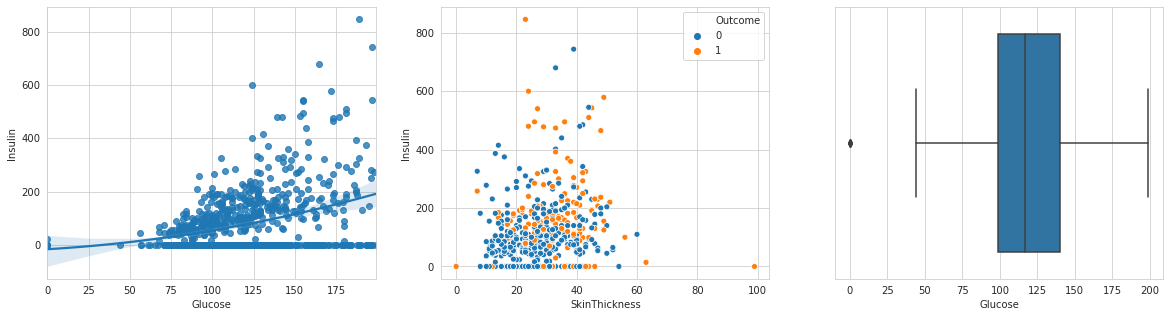

In [9]:
f,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(20,5))
y='Insulin'
sns.regplot(y=y,x='Glucose',data=df,order = 2,ax=ax1)
sns.scatterplot(y=y,x='SkinThickness',data=df , ax=ax2,hue='Outcome')
sns.boxplot(df.Glucose,ax=ax3)
print("This shows that the Higher Glucose. Higher Insuline")

##### Based on the Graph there is a better relation btwn Insulin-Glucose, so now I will fill them segmented by interval = 5

### 4.1. Finding Mean of Insulin

In [10]:
#Defining Intervals
lower = np.arange(26,236,5) #ax=ax Glucose we can see the min 20 , max 200
upper= np.arange(30,205,5)

#Finding the Insuline based on the Glucose/segmented 
def find_insuline (name,down,top):
    result = df.loc[(df['Insulin']>0)&(df['Glucose']>=down)&(df['Glucose']<=top)]['Insulin'].mean()
    result=np.round(result)
    Value.append(result)
    #print(f'the Mean of {name} in range {down}, {top} is :{result}')  
    
#Insuline Mean value  
Value= []
for i,j in zip(lower,upper):
    find_insuline("Insulin",i,j)
    
Value[1:9]  # <--- Here we have a lot of value but this way is more visualy friendly

[nan, nan, nan, nan, nan, 45.0, nan, 43.0]

###### The following Interval has Nan values so they will remain with 0 values 
1. The Mean of Insulin in range 31, 35 is :nan
2. The Mean of Insulin in range 36, 40 is :nan
3. The Mean of Insulin in range 41, 45 is :nan
4. The Mean of Insulin in range 46, 50 is :nan
5. The Mean of Insulin in range 51, 55 is :nan

###### The Interval from 61,65 has nan value, but I can interpolate the value from rank 56-60 and 66-70

### 4.2. Finding Index of Insulin == 0

In [11]:
#Finding Insulines zero value (based on gluose) _index by range
def find_insuline_index (name,down,top):
    Index= df[(df['Insulin']==0) & (df['Glucose']>=down) & (df['Glucose']<=top)].index.values
    Indexes.append(Index)
    #print(f'the index in range {down}, {top} is :{Index}')
    
#Index
Indexes =[]
for i , j in zip(lower,upper):
    find_insuline_index("Index",i,j)   

Indexes[10:13] #It will show all the indexes with Insulin == 0

[array([ 74,  90, 113, 117, 310, 494, 518, 570, 705]),
 array([  1,  60, 104, 133, 176, 194, 210, 218, 398, 418, 501, 510, 559,
        720]),
 array([ 38, 149, 172, 180, 253, 354, 434, 463, 491, 525, 542, 643, 694,
        762])]

### 4.3. Replacing Values 

In [12]:
#Total
for i,j in zip (np.arange(0,36,1),Value):
    df.loc[Indexes[i],"Insulin"]=j
# Values replace nan for 0    
for i in np.arange(0,4,1):
    df.loc[Indexes[i],"Insulin"]=0
#Interval from 61,65 with 42   
df.loc[Indexes[7],"Insulin"]=42

finding_zeros(df)

The numbers of 0 values in Pregnancies = 101
The numbers of 0 values in Glucose = 5
The numbers of 0 values in BloodPressure = 25
The numbers of 0 values in SkinThickness = 217
The numbers of 0 values in Insulin = 5
The numbers of 0 values in BMI = 10
The numbers of 0 values in DiabetesPedigreeFunction = 0
The numbers of 0 values in Age = 0


# "--------  Section 4 ----------"

## * 5. Finding Skin-Thickness*

This shows that the greater BMI ,the greater SkinThickness (it maskes sense)


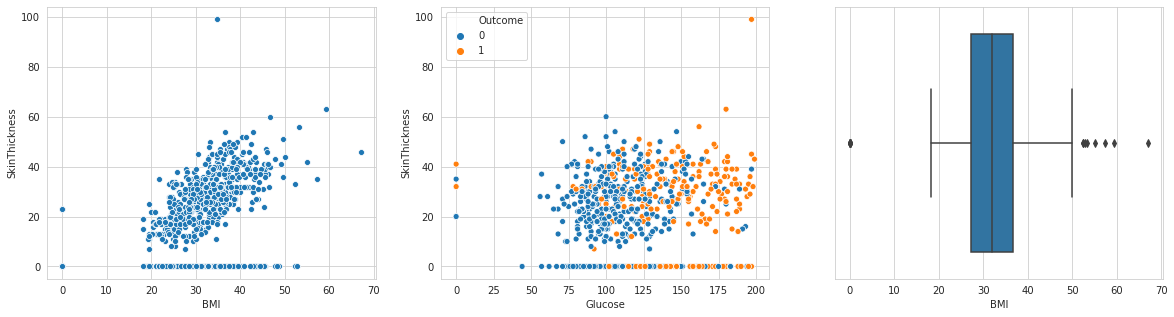

In [13]:
f,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(20,5))
y='SkinThickness'
sns.scatterplot(y=y,x='BMI',data=df,ax=ax1)
sns.scatterplot(y=y,x='Glucose',data=df , ax=ax2,hue='Outcome')
sns.boxplot(df.BMI,ax=ax3)
print("This shows that the greater BMI ,the greater SkinThickness (it maskes sense)")


### 5.1. Creating Intervals
### 5.2. Finding SlkinThickness Values (mean)

In [14]:
# I wont delete the oulier(except zero) because it is not wrong data, according to the Paper they are all girls 21>Age years old
i_skin = np.arange(15,70,5)
j_skin = np.arange(20,75,5)

#Finding Value based on BMI
def finding_skin (name,down,top):
    result = df.loc[(df['SkinThickness']>0)&(df['BMI']>=down)&(df['BMI']<=top)]['SkinThickness'].mean()
    result=np.round(result,2)
    Skin_values.append(result)
    #print(f'the Mean of {name} in range {down}, {top} is :{result}')
    
Skin_values =[]
for i, j in zip (i_skin,j_skin):
    finding_skin("Thickness",i,j)
    
Skin_values

[15.0, 18.56, 23.19, 29.62, 34.93, 38.31, 40.33, 43.75, 46.67, nan, 46.0]

### 5.3. Finding Skin-Thickness Index
    


In [15]:
def finding_skin_index (name,down,top):
    Index = df.loc[(df['SkinThickness']==0)&(df['BMI']>=float(down))&(df['BMI']<=float(top))]['SkinThickness'].index.values
    Skin_Index.append(Index)
    #print(f'the index in range {down}, {top} is :{Index}')
    
Skin_Index = []
for i, j in zip (i_skin,j_skin):
    finding_skin_index("Thickness",i,j)
    
Skin_Index[0:2]

[array([ 33,  90, 239, 418, 453]),
 array([  2,  62,  93, 102, 106, 140, 151, 180, 190, 196, 272, 278, 294,
        299, 304, 319, 333, 347, 398, 401, 407, 430, 461, 464, 509, 512,
        529, 537, 571, 587, 601, 626, 676, 686, 690, 694, 728, 734, 749,
        762])]

### 5.4. Replacing Values

In [16]:
#replacing Values    
for i,j in zip (np.arange(0,10,1),j_skin):
    df.loc[Skin_Index[i],"SkinThickness"]=j
    
finding_zeros(df)

The numbers of 0 values in Pregnancies = 101
The numbers of 0 values in Glucose = 5
The numbers of 0 values in BloodPressure = 25
The numbers of 0 values in SkinThickness = 8
The numbers of 0 values in Insulin = 5
The numbers of 0 values in BMI = 10
The numbers of 0 values in DiabetesPedigreeFunction = 0
The numbers of 0 values in Age = 0


# "--------  Section 5 ----------"

## 6. Variable related with 0 Values  
#### 6.1. Skinth Thickness ~ BMI

In [17]:
SKIN_BMI_ZERO= df[(df['SkinThickness']==0)&(df['BMI']==0)]
SKIN_BMI_ZERO

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,174.0,0.0,0.232,54,1
49,7,105,0,0,131.0,0.0,0.305,24,0
60,2,84,0,0,72.0,0.0,0.304,21,0
81,2,74,0,0,51.0,0.0,0.102,22,0
494,3,80,0,0,55.0,0.0,0.174,22,0
522,6,114,0,0,144.0,0.0,0.189,26,0
684,5,136,82,0,177.0,0.0,0.640,69,0
706,10,115,0,0,144.0,0.0,0.261,30,1


#### 6.2.Glucose ~ Insulin

In [18]:
BLOOD_INSULINE_ZERO= df[(df['Glucose']==0)&(df['Insulin']==0)]
BLOOD_INSULINE_ZERO

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0.0,24.7,0.140,22,0
342,1,0,68,35,0.0,32.0,0.389,22,0
349,5,0,80,32,0.0,41.0,0.346,37,1
502,6,0,68,41,0.0,39.0,0.727,41,1


### 6.3. Dropping Values


In [19]:
#Index
BLOOD_INSULINE_ZERO=df[(df['Glucose']==0)&(df['Insulin']==0)].index.values
SKIN_BMI_ZERO= df[(df['SkinThickness']==0)&(df['BMI']==0)].index.values

#Droping VAlues
df.drop(BLOOD_INSULINE_ZERO, inplace=True)
df.drop(SKIN_BMI_ZERO ,inplace=True)

## 7. Blood Pressure

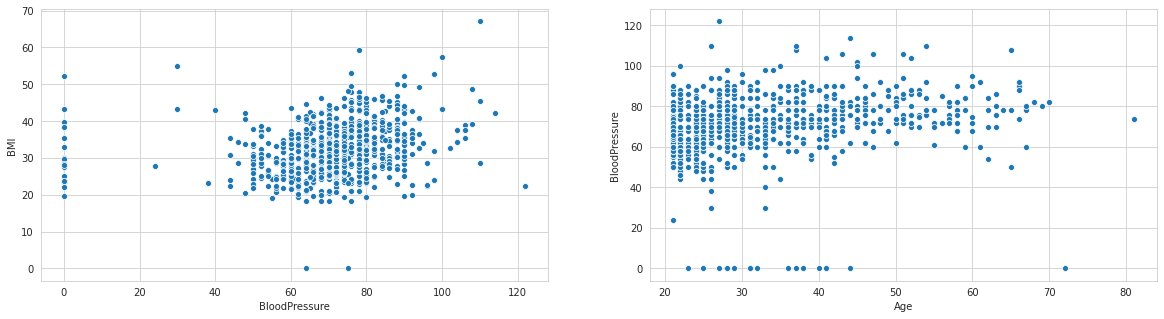

In [20]:
f,(ax1,ax2) =plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x='BloodPressure',y='BMI',data=df, ax=ax1)
sns.scatterplot(x='Age',y='BloodPressure',data=df, ax=ax2) 

I can apply the same methodology to 'bloodpresurre' but after consulting with doctor (Friend of mine) He claims that blood pressure con not be associate with age , because it varies according several factors and that are not showed in the Data 

In [21]:
df.drop(df[df['BloodPressure']==0].index.values,inplace=True)
#Finding Missing Values
NAN_value = (df.isnull().sum() / len(df)) * 100
Missing = NAN_value[NAN_value==0].index.sort_values(ascending=False)
Missing_data = pd.DataFrame({'Missing Ratio' :NAN_value})
Missing_data.head()

,Missing Ratio
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0


# "--------  Section 6 ----------"

## 8. Visualization

In [22]:
def boxplot (frame1,frame2,frame3):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
    sns.boxplot(frame1,ax=ax1)
    sns.boxplot(frame2,ax=ax2)
    sns.boxplot(frame3,ax=ax3)

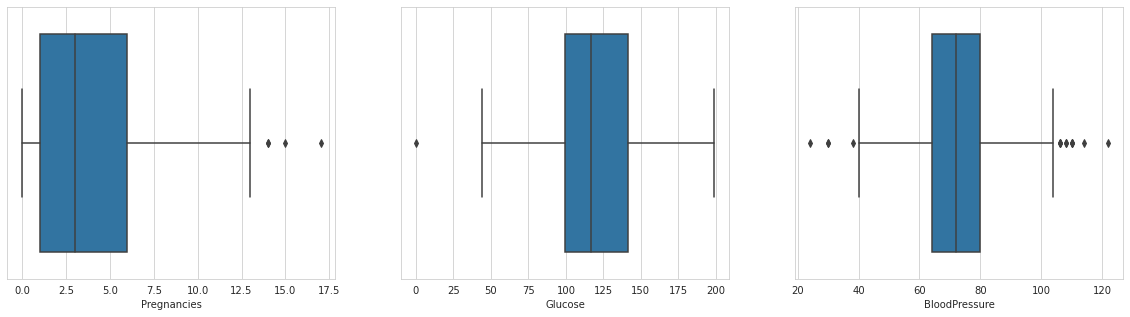

In [23]:
boxplot(df.Pregnancies,df.Glucose,df.BloodPressure)

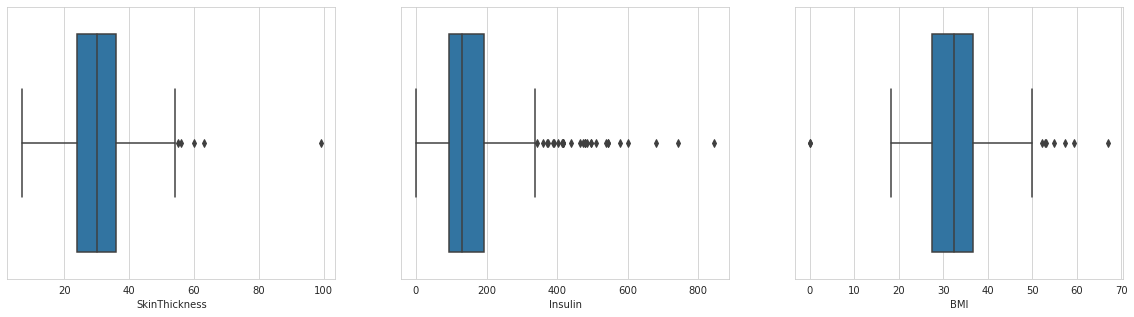

In [24]:
boxplot(df.SkinThickness,df.Insulin,df.BMI)

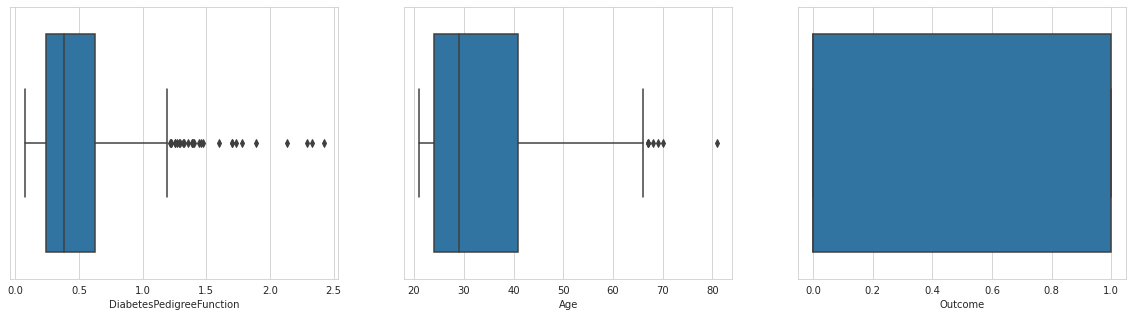

In [25]:
boxplot(df.DiabetesPedigreeFunction,df.Age,df.Outcome)

#### **We can easealy notice that there are so many outliers**

# "--------  Section 7 ----------"

## 9. Outliers

In [26]:
preg = df.loc[df['Pregnancies']>=15]['Pregnancies'].count()
glu = df.loc[df['Glucose']<40]['Glucose'].count()
blood_1 =df[df['BloodPressure']<40]['BloodPressure'].count() 
blood_2 = df[df['BloodPressure']>100]['BloodPressure'].count()
blood = blood_1 + blood_2
skin = df[df['SkinThickness']>55]['SkinThickness'].count()
insu =df[df['Insulin']>380]['Insulin'].count()
bmi = df[df['BMI']>50]['BMI'].count()
dia = df[df['DiabetesPedigreeFunction']>1.2]['DiabetesPedigreeFunction'].count()
age= df[df['Age']>63]['Age'].count()
outliers = [preg,glu,blood,skin,insu,bmi,dia,age]
Outliers = pd.DataFrame(data=outliers, index = df.columns[0:8], columns=['Outliers'])
Outliers

,Outliers
Pregnancies,2
Glucose,1
BloodPressure,17
SkinThickness,4
Insulin,26
BMI,7
DiabetesPedigreeFunction,29
Age,15


### Dropping Outliers

In [27]:
preg_i = df.loc[df['Pregnancies']>=15]['Pregnancies'].index.values
glu_i = df.loc[df['Glucose']<40]['Glucose'].index.values
blood_1_i =df[df['BloodPressure']<40]['BloodPressure'].index.values 
blood_2_i= df[df['BloodPressure']>100]['BloodPressure'].index.values
skin = df[df['SkinThickness']>55]['SkinThickness'].index.values
insu =df[df['Insulin']>380]['Insulin'].index.values
bmi = df[df['BMI']>50]['BMI'].index.values
dia = df[df['DiabetesPedigreeFunction']>1.2]['DiabetesPedigreeFunction'].index.values
age= df[df['Age']>63]['Age'].index.values

ind_out = [preg_i,glu_i,blood_1_i,blood_2_i,skin,insu,bmi,dia,age]
for i in ind_out:
    df_out= df.drop(i)

# "--------  Section 8 ----------"

## 10. Applying Machine Learning 
1. ##### Splitting Data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score

X=df_out.drop('Outcome',axis=1)
y=df_out['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### 2. Applying Random Forest Tree

In [29]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC_model =RFC.fit(X_train,y_train)
y_pred_RFC= RFC.predict(X_test)
y_pred_RFC

print(classification_report(y_test,y_pred_RFC))
RFC_cm =confusion_matrix(y_test,y_pred_RFC)
print(f1_score(y_test,y_pred_RFC))
#confusion_matrix(y_pred_RFC, y_test)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       155
           1       0.68      0.62      0.65        80

    accuracy                           0.77       235
   macro avg       0.75      0.74      0.74       235
weighted avg       0.77      0.77      0.77       235

0.65359477124183


##### 3. Applying Logistic Regression

In [30]:
from sklearn.preprocessing import StandardScaler

ES=StandardScaler()
ES=ES.fit_transform(df_out.drop('Outcome',axis=1))
data= pd.DataFrame(ES , columns= df.columns[:-1])
data.head(4) # data_p = Data already Processed

X_data=data
y_data=df_out['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=101)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.645219,0.864399,-0.019764,0.469141,0.790443,0.165731,0.442578,1.619035
1,-0.838618,-1.179430,-0.507813,-0.133255,-0.827536,-0.820307,-0.376474,-0.146853
2,1.238753,1.999859,-0.670495,-0.534852,1.704952,-1.285153,0.576119,-0.053911
3,-0.838618,-1.049663,-0.507813,-0.735651,-0.606445,-0.609013,-0.922509,-1.076267
4,-1.135385,0.507540,-2.622689,0.469141,0.137222,1.503925,5.371731,0.039030


In [31]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log=log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)

log_m = confusion_matrix(y_test,y_pred_log )
                         
print(classification_report(y_test,y_pred_log))
#print(confusion_matrix(y_test,y_pred_log))
print(f1_score(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       155
           1       0.72      0.59      0.65        80

    accuracy                           0.78       235
   macro avg       0.76      0.74      0.75       235
weighted avg       0.78      0.78      0.78       235

0.6482758620689656


##### 4. Applying KNN 

 K=3 is the most accurate rate because the error is closest to 0 


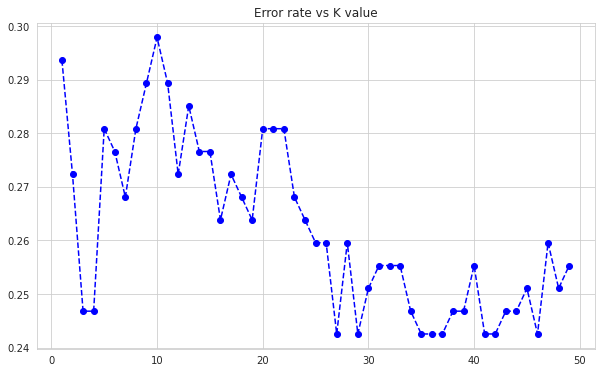

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Error_Rate = []
for i in range (1,50):
    
    KNN_Error = KNeighborsClassifier(n_neighbors=i)
    KNN_Error.fit(X_train,y_train)
    pred_i = KNN_Error.predict(X_test)
    Error_Rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), Error_Rate , color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error rate vs K value')
print( " K=3 is the most accurate rate because the error is closest to 0 ")    


In [33]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN=KNN.fit(X_train,y_train)
y_pred_KNN= KNN.predict(X_test)

KNN_cm =confusion_matrix(y_test,y_pred_KNN)
print(classification_report(y_test,y_pred_KNN))
#print(confusion_matrix(y_test,y_pred_KNN))
f1_score(y_test,y_pred_KNN)


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       155
           1       0.65      0.59      0.62        80

    accuracy                           0.75       235
   macro avg       0.73      0.71      0.72       235
weighted avg       0.75      0.75      0.75       235



0.6184210526315789

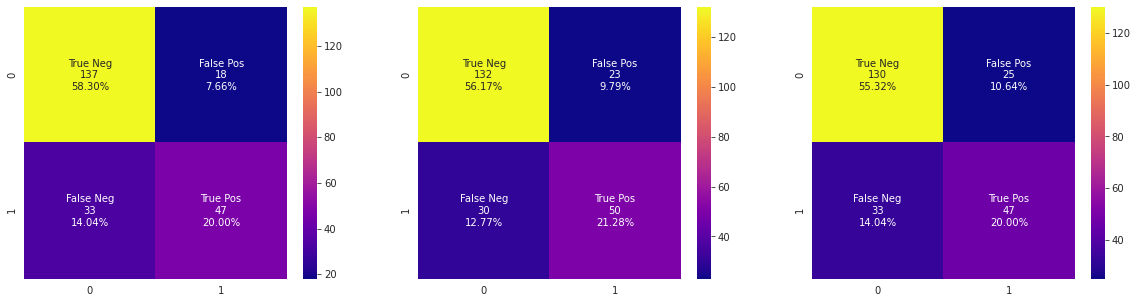

In [34]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
model= [log_m,RFC_cm,KNN_cm]
axes= [ax1,ax2,ax3]

for i,j in zip (model,axes):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
        
    group_counts = ['{0:0.0f}'.format(value) for value in
                i.flatten()]
        
    group_percentages = ['{0:.2%}'.format(value) for value in
                     i.flatten()/np.sum(i)]
        
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
     zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
        
    ax =sns.heatmap(i, annot=labels, fmt='', cmap='plasma',ax=j)

                                             **From *LEFT* to *RIGHT***  Logistical Regression - Random Forest - KNN cluster